# Focal Loss implementation in a Logistic Regression

### By Tanguy Magon and Bruno Pylarczyk

##### What is logistic regression in a nutshell ?

Logistic regression is widely used for binary classification, which means that the dependant variable is categorical.
For example it can be used to predict whether an email is spam (1) or not (0)

The logistic regression use the sigmoid function as "logistic function" or "log loss" to generate probabilities that are between 0 and 1.

The formula is the following : 

$$ h_ \theta (x) =  \frac{\mathrm{1} }{\mathrm{1} + e^- \theta^{Tx} }  $$ 

Where 

$$ \theta^Tx  =  [ \theta_{0}, \theta_{1}, ... ,\theta_{j}]\begin{bmatrix}
x_{0}\\
x_{1}\\
...  \\
x_{j}
\end{bmatrix}  $$ 

The code to create this function is quite simple : 

In [5]:
import pandas as pd
import numpy as np
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Then we need a decison boundary to convert probabilities into a discrete class, for example :
    

$$ p  \ge 0.5, class = 1 \\ p  < 0.5, class = 0$$


So to if we define 

$$ z  = W_{0} + W_{1}Work + W_{2}Sex $$

With Work and Sex some variable defined, we will have :

$$ P(class = 1) = \frac{\mathrm{1} }{\mathrm{1} + e^{- z} } $$

##### Cost and Loss function 

Usually, linear regression uses Least Squared Error as a loss function, for at the end computing the global minimum of a convex graph, a simple optimization problem. However, in a logistic regression, it is not recommended because the LSE will result to a non convex graph with local minimum. 
In order to find the best parameters (or weights, tipycally the thetas in the sigmoid function), we compute the loss thanks to the loss function. That way, we can measure how well the algorithm performs.

The loss function of the logistic regression is usually the following : 

 $\beta = (w, b)\text{ and }\beta^Tx=w^Tx +b$:

 $$l(\beta) = \sum\limits_{i=1}^{m}\Big(-y_i\beta^Tx_i+\ln(1+e^{\beta^Tx_i})\Big)  \tag 1$$

We want this loss to be as miminum as possible, as we can notice in this formula, it is the diffence between the prediction and the actual values. 

What we want here is to add more cost when we predicting 1 while the actual and when predict 0 while the actual is 1.
If we decompose this function into to parts, we have this kind of cost function:

$$ Cost(h_{\theta}(x),y) = \left\{
    \begin{array}{ll}
        - log(h_{\theta}(x))  ~ ~ ~ ~ ~ ~ ~ \mbox{  if y = 1} \\
        - log(1 - h_{\theta}(x)) \mbox{  if y = 0}
    \end{array}
\right. \\ \\ \mbox{Where} ~ h_{\theta}(x) ~ \mbox{is the prediction} $$

In case where y = 1, the output will be close to 0 as the prediction is close to 1 and conversely, the output grows to infinity as the prediction is close to 0. As a result there is a bigger punishment as the algorithm predicts something far away the actual value. 
One we to see it is to plot the cost function : 

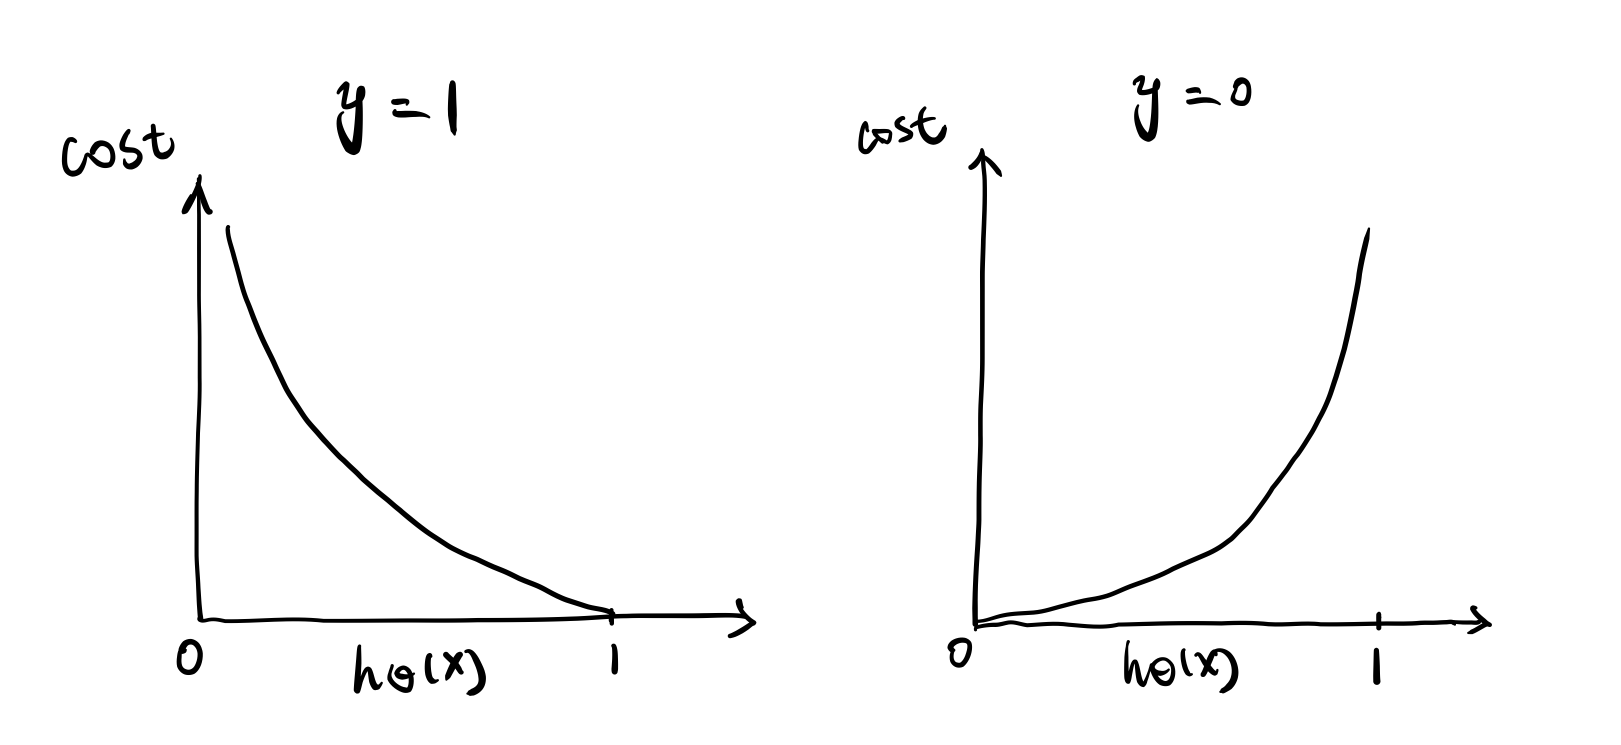

In [7]:
from IPython.display import display, Image

display(Image(filename='costfunction.png'))

We can also code it: 

In [1]:
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

So how to minimize the loss function ? The best known way is to do some gradient descent! 

##### Gradient Descent 

One way to minimize the cost function is to compute its derivatives with respec to the parameters and then update the parameters by substracting to them the derivatives times the learning rate (the lower the value, the slower we travel along the downward slope), and repeat this operation untill finding the minimum. This is what we call the gradient descent algorithm.

##### The focal loss 

The focal loss as its name indicates is a loss function. 
It is widely used for imbalenced data which means there are a disproportionate ratio of observations in each class (for example in fraud detection there are very few fraud observation).

The problem with imbalenced data is that most machine learning algorithm works best when the number of samples in each class are about equal (they are designed to maximize accuracy and reduce error). They tend to predict only the majority class data. 

The focal loss definition tells us that it will reduce the loss computed on well classified examples because there will be a large amount of them and they will be always well classified. 

As we saw earlier for binary classification, the cost function, also called cross entropy (CE) is the following, for the sake of simplification we will call the prediction by "p" this time : 

$$ CE(p,y) = \left\{
    \begin{array}{ll}
        - log(p)  ~ ~ ~ ~ ~ ~ ~ \mbox{  if y = 1} \\
        - log(1 - p) \mbox{  otherwise}
    \end{array}
\right. $$

and it can be simplified by doing the following transformation :

$$ CE(p,y) = CE(p_{t}) = -log(p_{t}) $$

Say we are in a case of an imbalenced data and we assign for example a loss of 1 to well classified examples and 5 to misclassified example. Then if we have 100 well classified example, their total loss will be 100x1 = 100. And if we have 5 misclassified example, the total loss will be 5x5 = 25. Therefore, the well classified examples overwhelm the minority class and we don't want that to happen. 

The method usually used to deal with umbalenced data is to introduce a weighting factor $ \alpha $ with its value between 0 and 1. 
The aim of this parameters is to balance the importance of well classified and misclassified examples. But the probkem is that it doesn't make the difference between the "easy" well classified  and the "hard"  examples. For example in our example of spam or email classification, the easy one to classify will be the email labelled because they are numerous and the hard one will be the spam labelled. 
Hopefully, the focal do this job by reducing the weights of the easy examples and increasing the weights of the hard examples. It is well done by adding a modulating factor $ (1-p_{t})^{\gamma} $ instead of just $ \alpha $
But in practice both $ \alpha $ and $ (1-p_{t})^{\gamma} $ are used in the focal loss for better results.
Which at the end gives us the following formula for the Focal Loss (FL) : 

$$ FL(p_{t}) = -\alpha(1-p_{t})^{\gamma}log(p_{t}) $$

$\gamma$ is called her the focusing parameter, the purpose of this parameter is to reduce the contribution of the easy examples. 

##### Coding the implementation of the focal loss in a logistic regression

Now we have seen how the logistic regression works as well as the focal loss, we can code it to implement the focal in a logistic regression!

We can define the focal loss function as 

In [1]:
def focal_loss(y_true, y_pred):
    gamma = 4 #gamma fixed
    alpha = 2 #alpha fixed
    pt_1 = np.copy(y_pred) #preparing pt1 and pt0 for the computation of the total cost
    pt_1[y_true!=1] = 1
    pt_0 = np.copy(y_pred)
    pt_0[y_true!=0] = 0 
    #the total cost is the focal loss
    total_cost = -np.sum(-alpha * (1 - pt_1)**gamma * np.log(pt_1)) -np.sum(-alpha * (1 - pt_0)**gamma * np.log(pt_0))
    return total_cost

We can use the function make_score that can modify the loss function of the logistic regression by doing a grid search

In [4]:
from sklearn.metrics import make_scorer,confusion_matrix, f1_score, precision_score, recall_score, accuracy_score

In [5]:
custom_scorer = make_scorer(focal_loss, greater_is_better=False)

In [6]:
import pandas as pd
import numpy as np

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split

We use GridSearch with the option "scoring" to call the focal loss

In [8]:
logistic = LogisticRegression()
params = {"penalty" : ['l1','l2'],
         "C" : [1,2,3,4]}
logistic_opt = GridSearchCV(logistic, params, scoring=custom_scorer, n_jobs=-1, cv=10)

Now we import the data to test our model 

In [9]:
data = pd.read_csv('creditcard.csv')

In [10]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


We build a train and a test set 

In [11]:
X = data.drop(['Class'], axis=1).copy()
Y = data.Class.copy()

X_train, X_test, y_train, y_test = train_test_split(X,Y)

Now we can fit our model to the data

In [12]:
logistic_opt.fit(X_train,y_train)
logistic_opt.best_estimator_

C:\anconda3\lib\site-packages\sklearn\model_selection\_search.py:763: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
C:\anconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Finally we compute the prediction and display the confusion matrix

In [13]:
y_pred = logistic_opt.predict(X_test)

In [14]:
confusion_matrix(y_test, y_pred)

array([[71068,    12],
       [   52,    70]], dtype=int64)

In [15]:
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9991011488441336
0.5737704918032787
0.8536585365853658
0.6862745098039217


The f1 score is not that bad as well as the confusion matrix, remember to never look at the accuracy score when you are doing machine learning algorithm, by its definition it will give you always a good score. The recall is the one you should try to optimize, as well as the f1 score.

##### References

https://towardsdatascience.com/building-a-logistic-regression-in-python-301d27367c24 

https://towardsdatascience.com/custom-loss-functions-for-gradient-boosting-f79c1b40466d 

https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac 

https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18  

https://towardsdatascience.com/optimization-loss-function-under-the-hood-part-ii-d20a239cde11 